In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
aviation_dataframe = pd.read_csv("https://raw.githubusercontent.com/mettiu97/Portfolio-Mattia-D-Aiuto/refs/heads/main/aviation-accidents.csv")
aviation_dataframe

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [2]:
aviation_dataframe.info()
# Check how many null values are present in the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [3]:
def clean_dataframe(df):

    # Convert 'fatalities' to numeric, handling mathematical expressions.
    def safe_eval(x):
        try:
            return eval(x) if isinstance(x, str) and any(c in x for c in "+-*/") else pd.to_numeric(x, errors='coerce')
        except:
            return 0

    df['fatalities'] = df['fatalities'].apply(safe_eval)

    # Replace NaN values and other specific strings with “unknown”
    unknown_values = [np.nan, "date unk.", "Unknown country"]
    df.replace(unknown_values, "unknown", inplace=True)

    # Remove leading and trailing whitespace in text values.
    df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

    # Remove columns not needed for analysis.
    aviation_dataframe.drop(columns=['cat', 'location', 'registration'], inplace=True, errors='ignore')

    return df

# Example of use:
# df = clean_dataframe(df)


In [5]:
df = clean_dataframe(aviation_dataframe)
aviation_dataframe
# verify that all values have been converted by printing the dataframe again


,date,type,operator,fatalities,country,year
0,unknown,Antonov An-12B,Indonesian AF,unknown,unknown,unknown
1,unknown,Antonov An-12B,Indonesian AF,unknown,unknown,unknown
2,unknown,Antonov An-12B,Indonesian AF,unknown,unknown,unknown
3,unknown,Antonov An-12BK,Soviet AF,unknown,Russia,unknown
4,unknown,Antonov An-12BP,Soviet AF,0.0,Eritrea,unknown
...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,Angkasa Super Services,0.0,Indonesia,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,Nasional Global Aviasi,0.0,Indonesia,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,Bar Aviation,0.0,Uganda,2023
23965,14-MAY-2023,Boeing 747-4R7F,Cargolux,0.0,Luxembourg,2023


In [6]:
aviation_dataframe.info()
# Verify that all changes to the dataframe were successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        23967 non-null  object
 1   type        23967 non-null  object
 2   operator    23967 non-null  object
 3   fatalities  23967 non-null  object
 4   country     23967 non-null  object
 5   year        23967 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [7]:
def plot_operators_0death(df):

    # Connverts the fatalities column and Removes NaN values so you have a more accurate analysis
    df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
    df.dropna(subset=['fatalities'], inplace=True)
    safe_operators = df.groupby('operator').agg(fatalities=('fatalities', 'sum'), incidents=('operator', 'count'))
    safe_operators = safe_operators[safe_operators['fatalities'] == 0]
    safe_operators = safe_operators[safe_operators['incidents'] >= 8].sort_values(by='incidents', ascending=True)

    plt.figure(figsize=(12, 6))
    plt.barh(safe_operators.index, safe_operators['incidents'], color='#007fff')
    plt.xlabel("Number of accidents")
    plt.ylabel("Operators")
    plt.title("Operators with 0 dead and accidents >=8")
    plt.gca().invert_yaxis()

    plt.show()

    # Example of use:
    # plot_operators_0death(df)

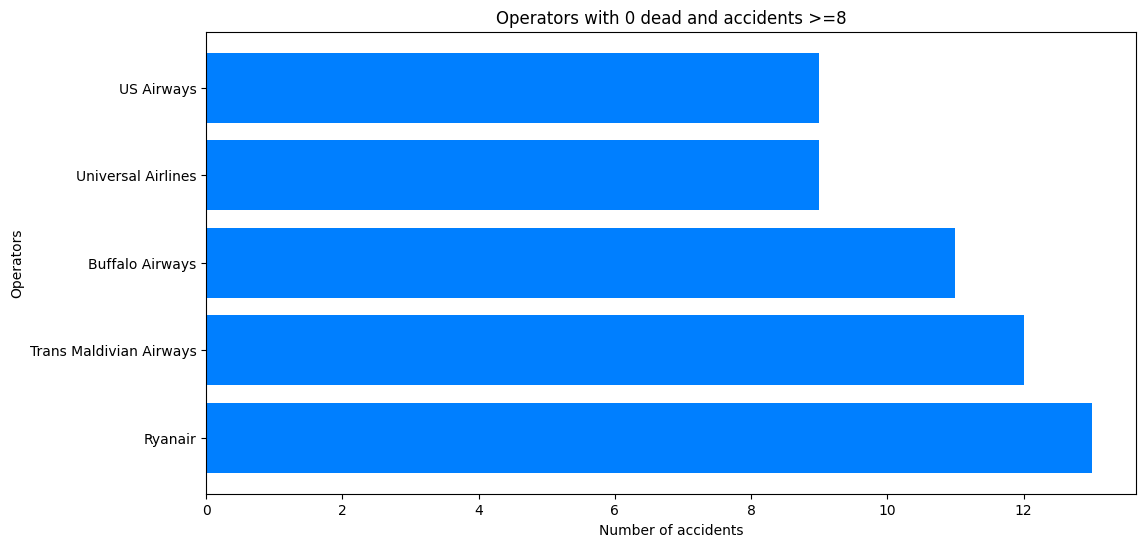

In [19]:
plot_operators_0death(aviation_dataframe)

In [9]:

def plot_accidents_cartogram(df):

    # Download the Natural Earth dataset.
    world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

    country_counts = df['country'].value_counts().reset_index()
    country_counts.columns = ['country', 'accidents']

    # Correct country names to match the geographic dataset.
    country_corrections = {
        "USA": "United States of America",
        "U.K.": "United Kingdom",
    }
    country_counts['country'] = country_counts['country'].replace(country_corrections)

    world = world.merge(country_counts, left_on='NAME', right_on='country', how='left')
    world = world.infer_objects(copy=False)  # Converts objects into appropriate types
    world['accidents'] = world['accidents'].fillna(0)  # Fills NaN with 0 only for column 'accidents'

    fig, ax = plt.subplots(figsize=(15, 8))
    world.plot(column='accidents', cmap='Reds', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
    ax.set_title("Number of aviation accidents by Country")

    plt.show()

def top_five_countries(df):
    top_countries = df['country'].value_counts().head(5)
    print("Countries by number of accidents:")
    print(f"Top 5 {top_countries}")


    # Example of use:
    # plot_accidents_cartogram(df)
    # top_five_countries(df)



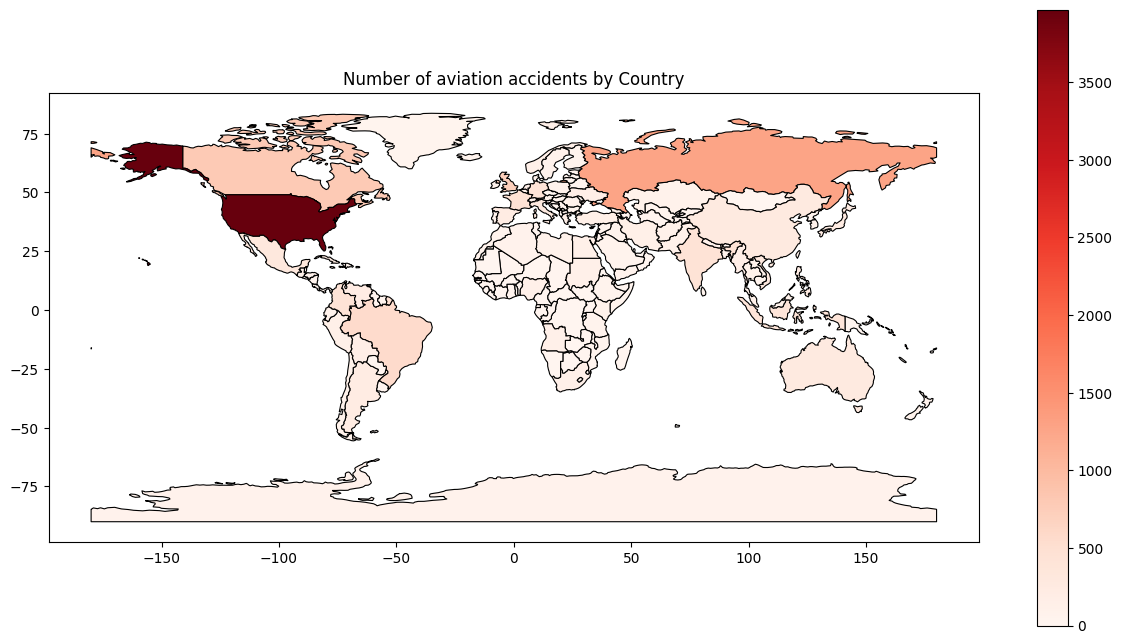

Countries by number of accidents:
Top 5 country
USA       3966
Russia    1284
Canada     791
U.K.       719
Brazil     573
Name: count, dtype: int64


In [20]:
plot_accidents_cartogram(aviation_dataframe)
top_five_countries(aviation_dataframe)

In [11]:
def plot_fatalities_pre_post_9_11(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date'], inplace=True)
    df['year'] = df['date'].dt.year
    df['post_9_11'] = df['date'] >= '2001-09-11'

    # Average daily number of deaths pre- and post-September 11, 2001.
    fatalities_per_day = df.groupby(['year', 'post_9_11'])['fatalities'].sum() / df.groupby(['year', 'post_9_11']).size()
    fatalities_per_day = fatalities_per_day.unstack()

    # Pre- and post-9/11 death graph.
    fatalities_per_day.plot(kind='line', marker='o', figsize=(10, 5))
    plt.title("Average daily number of deaths pre and post September 11, 2001")
    plt.xlabel("Year")
    plt.ylabel("Daily average number of deaths")
    plt.legend(["Pre 11/09/2001", "Post 11/09/2001"])
    plt.show()

    # Print the exact number of dead on September 11, 2001.
    fatalities_on_9_11 = df[df['date'] == '2001-09-11']['fatalities'].sum()
    print(f"Number of deaths on September 11, 2001: {fatalities_on_9_11}")

    # Example of use:
    # plot_fatalities_pre_post_9_11(df)

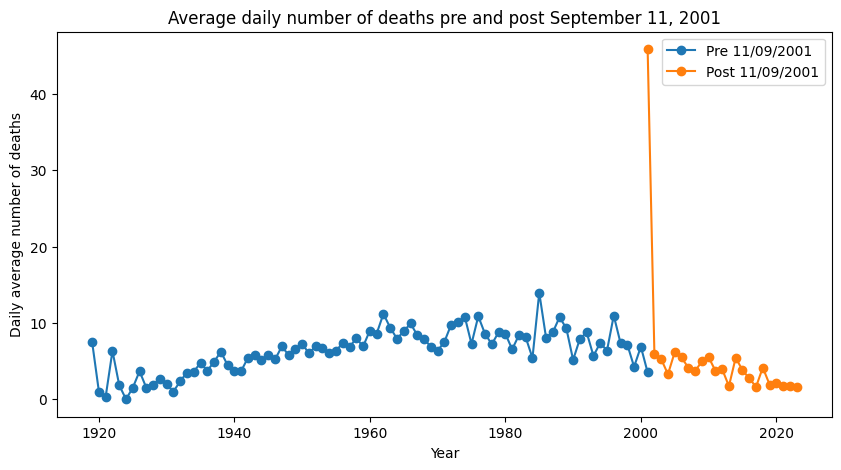

Number of deaths on September 11, 2001: 2890.0


In [21]:
plot_fatalities_pre_post_9_11(aviation_dataframe)

In [13]:
def plot_top5_accidents_country(df, top_n=5):
    country_counts = df['country'].value_counts().head(top_n)

    yearly_accidents = df.groupby(['year', 'country']).size().unstack().fillna(0)
    top_countries = country_counts.index
    yearly_accidents = yearly_accidents[top_countries]

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Accident graph by country.
    axes[0].bar(country_counts.index, country_counts.values, color='skyblue')
    axes[0].set_xlabel("Country")
    axes[0].set_ylabel("Number of accidents")
    axes[0].set_title(f"Top {top_n} Countries with the most aviation accidents")
    axes[0].tick_params(axis='x', rotation=45)

    # Graph number of accidents per year in top 5 countries.
    yearly_accidents.plot(kind='line', marker='o', ax=axes[1], colormap='Paired')
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("Number of accidents")
    axes[1].set_title("Number of accidents by year in Top 5 Countries")
    axes[1].legend(title="Country")

    plt.tight_layout()
    plt.show()

    # Example of use:
    # plot_top5_accidents_country(df)


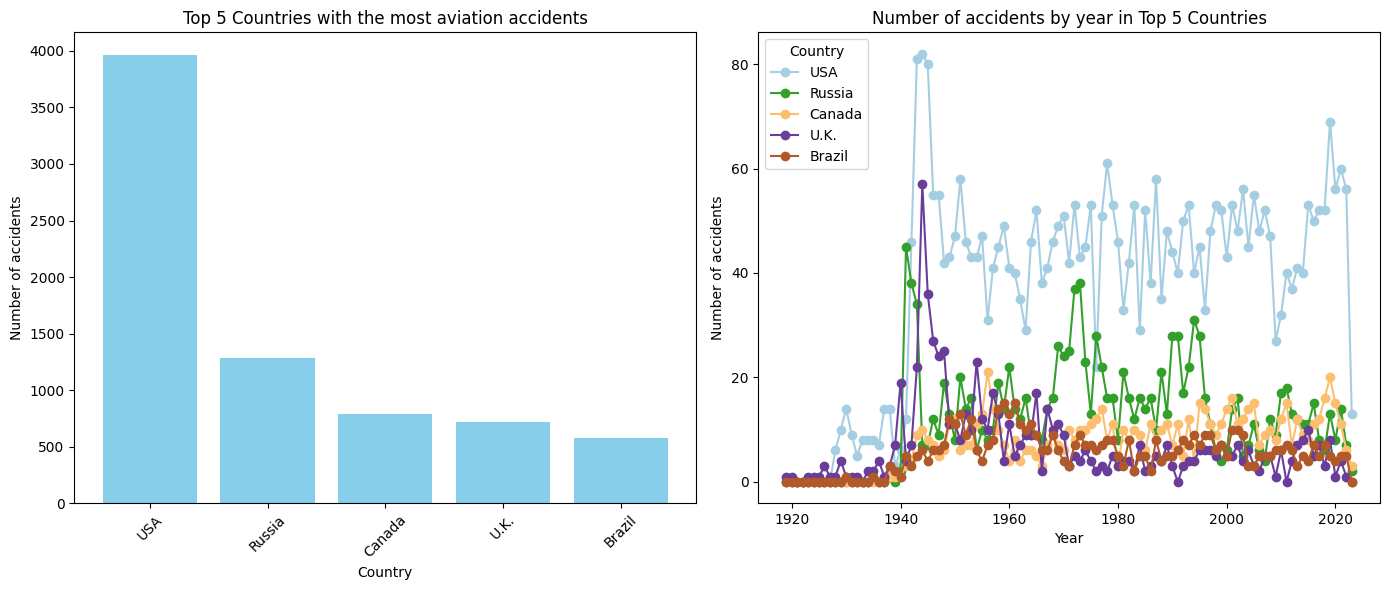

In [22]:
plot_top5_accidents_country(aviation_dataframe)

In [23]:
def plot_fatalities_by_aircraft(df):
    aircraft_stats = df.groupby('type').agg({'fatalities': 'sum', 'type': 'count'}).rename(columns={'type': 'incidents'}).reset_index()
    top_aircrafts = aircraft_stats.nlargest(5, 'fatalities')

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Graph showing Types of aircraft with the most Deaths and number of accidents
    ax2 = ax1.twinx()
    ax1.bar(top_aircrafts['type'], top_aircrafts['fatalities'], color='red', alpha=0.7, label='Numbers of death')
    ax2.plot(top_aircrafts['type'], top_aircrafts['incidents'], marker='o', color='blue', linestyle='dashed', label='Numbers of accidents')

    ax1.set_xlabel("Aircraft type")
    ax1.set_ylabel("Numbers of death", color='red')
    ax2.set_ylabel("Numbers of accidents", color='blue')

    ax1.tick_params(axis='x', rotation=45)
    ax1.set_title("Types of aircraft with the most Deaths and number of accidents.")
    ax1.legend(loc='upper center')
    ax2.legend(loc='upper right')

    plt.show()

    # Example of use:
    # plot_fatalities_by_aircraft(df)

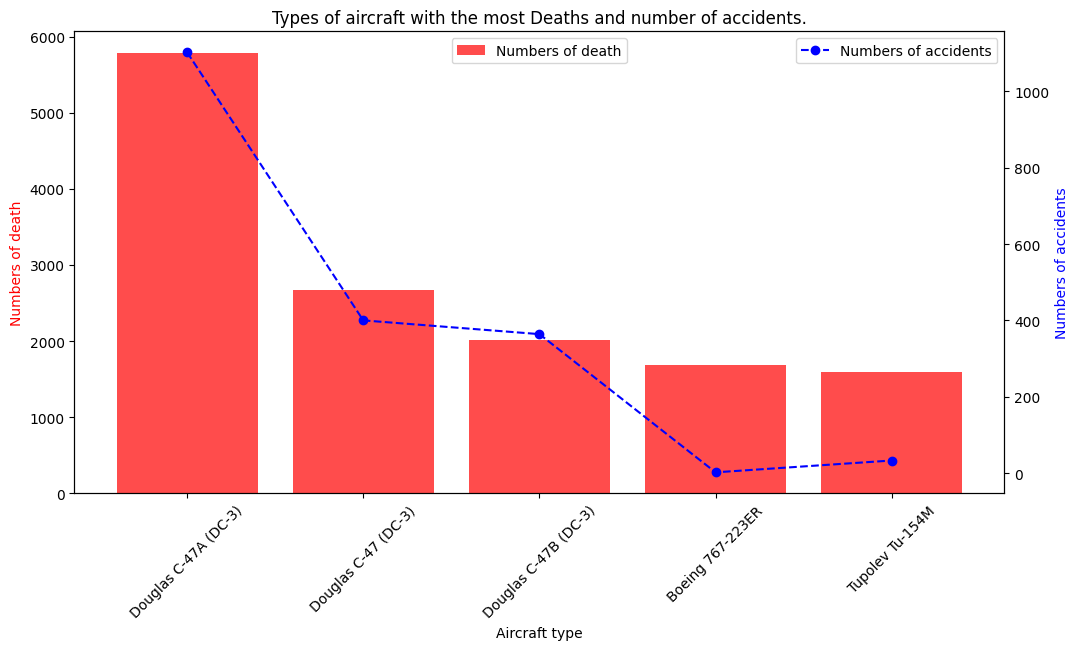

In [24]:
plot_fatalities_by_aircraft(aviation_dataframe)

In [25]:
def plot_accidents_by_weekday(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date'], inplace=True)
    df['weekday'] = df['date'].dt.day_name()

    # Accidents by day of the week
    weekday_counts = df['weekday'].value_counts()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts = weekday_counts.reindex(weekday_order)

    # Accident graph by day of the week.
    plt.figure(figsize=(8, 5))
    plt.bar(weekday_counts.index, weekday_counts.values, color='#e52b50')
    plt.title("Accidents by day of the week")
    plt.xlabel("Day of the week")
    plt.ylabel("Number of accidents")
    plt.xticks(rotation=45)
    plt.show()

    # Example of use:
    # plot_accidents_by_weekday(df)


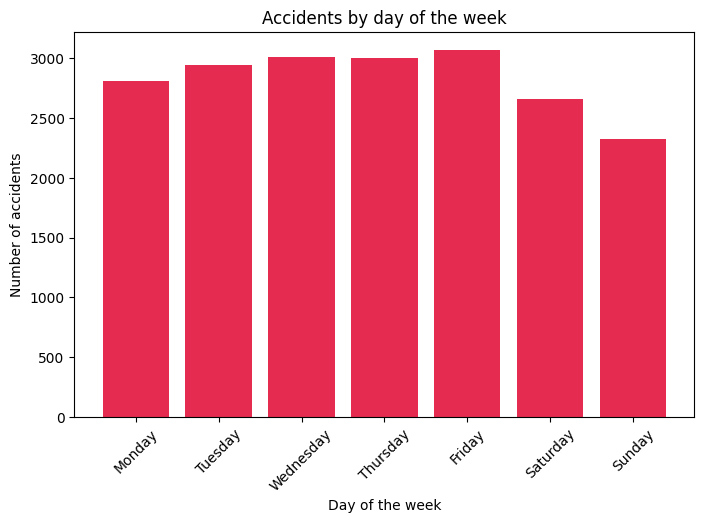

In [26]:
plot_accidents_by_weekday(aviation_dataframe)